In [370]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_file = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug = pd.read_csv(mouse_drug_data_file)
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [371]:
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [372]:
# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
# Display the data table for preview

mouse_clinical = pd.merge( clinical_trial, mouse_drug, how="left", on=("Mouse ID" , "Mouse ID"))
# mouse_clinical.head()

## Tumor Response to Treatment

In [373]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame;  Preview DataFrame
angry_tumor = mouse_clinical.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
angry_tumor
angry_tumor_df = pd.DataFrame(angry_tumor)
# angry_tumor_df.head()

In [374]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint - sem
# Convert to DataFrame ; Preview DataFrame
error_tumor = mouse_clinical.groupby([ "Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# error_tumor.head()
error_tumor_df = pd.DataFrame(error_tumor)
# error_tumor_df.head()

In [375]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
mung_tumor = angry_tumor_df.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# mung_tumor.head()

In [376]:
glitch_tumor = error_tumor_df.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# glitch_tumor.head()

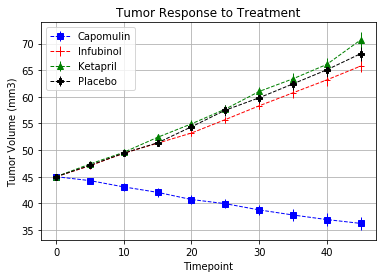

In [377]:
# Generate the Plot (with Error Bars)
# Save the Figure
plt.errorbar(mung_tumor.index, mung_tumor["Capomulin"], yerr=glitch_tumor["Capomulin"], linestyle="dashed",marker="s",color="blue", linewidth=1 )
plt.errorbar(mung_tumor.index, mung_tumor["Infubinol"], yerr=glitch_tumor["Infubinol"], linestyle="dashed",marker="+",color="red", linewidth=1 )
plt.errorbar(mung_tumor.index, mung_tumor["Ketapril"], yerr=glitch_tumor["Ketapril"], linestyle="dashed",marker="^",color="green", linewidth=1 )
plt.errorbar(mung_tumor.index, mung_tumor["Placebo"], yerr=glitch_tumor["Placebo"], linestyle="dashed",marker="P",color="black", linewidth=1 )

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid()
plt.savefig("Tumor Response Treatment 180928.png")
plt.show()

## Metastatic Response to Treatment

In [323]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_met = mouse_clinical.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
mean_met_df = pd.DataFrame(mean_met)
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [324]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
met_tumor = mouse_clinical.groupby([ "Drug", "Timepoint"]).sem()["Metastatic Sites"]
# error_tumor.head()
met_tumor_df = pd.DataFrame(met_tumor)
met_tumor_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [325]:
met_met = mean_met_df.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
met_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [326]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
error_met = met_tumor_df.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
error_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


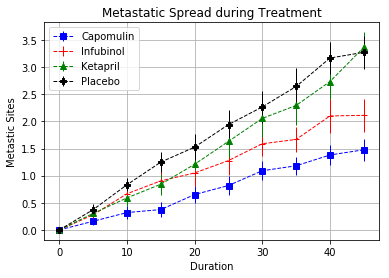

In [342]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
plt.errorbar(met_met.index, met_met["Capomulin"], yerr=error_met["Capomulin"],linestyle="dashed", marker="s",color="blue", linewidth=1 )
plt.errorbar(met_met.index, met_met["Infubinol"], yerr=error_met["Infubinol"],linestyle="dashed", marker="+",color="red", linewidth=1 )
plt.errorbar(met_met.index, met_met["Ketapril"],  yerr=error_met["Ketapril"], linestyle="dashed",marker="^",color="green", linewidth=1 )
plt.errorbar(met_met.index, met_met["Placebo"],   yerr=error_met["Placebo"], linestyle="dashed", marker="P",color="black", linewidth=1 )

plt.title("Metastatic Spread during Treatment")
plt.xlabel("Duration")
plt.ylabel("Metastic Sites")
plt.legend(loc="best")
plt.grid()
plt.savefig("Metastatic Spread during Treatment 180928.png")
plt.show()

## Survival Rates

In [330]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mice_count = mouse_clinical.groupby(["Drug", "Timepoint"]).count()["Metastatic Sites"]
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.rename(columns={"Metastatic Sites" : "Mouse Count"})
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [331]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
mice_pivot = mice_count_df.pivot_table(index="Timepoint", columns="Drug", values="Mouse Count")
mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


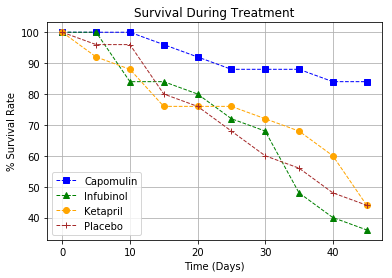

In [343]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
plt.plot(mice_pivot["Capomulin"]*100/25, linestyle="dashed", marker="s",color="blue", linewidth=1)
plt.plot(mice_pivot["Infubinol"]*100/25,linestyle="dashed", marker="^",color="green", linewidth=1)
plt.plot(mice_pivot["Ketapril"]*100/25,linestyle="dashed", marker="o",color="orange", linewidth=1)
plt.plot(mice_pivot["Placebo"]*100/25,linestyle="dashed", marker="+",color="brown", linewidth=1)
       
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("% Survival Rate")
plt.legend(loc="best")
plt.grid()
plt.savefig("Survival During Treatment 180928.png")
plt.show()

## Summary Bar Graph

In [334]:
# Calculate the percent changes for each drug
# Display the data to confirm
percent_change = ((mung_tumor.iloc[-1] - mung_tumor.iloc[0])/mung_tumor.iloc[0])*100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

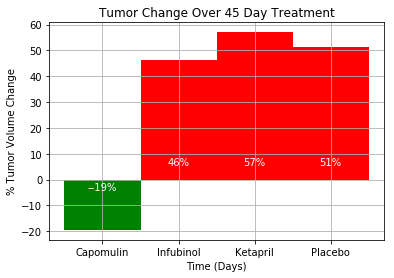

In [382]:
# Store all Relevant Percent Changes into a Tuple
merrill = (percent_change["Capomulin"], 
           percent_change["Infubinol"],
           percent_change["Ketapril"], 
           percent_change["Placebo"])
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
ind = np.arange(len(merrill))
width = 1
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("% Tumor Volume Change")
tick_loc = (ind)
plt.xticks(tick_loc, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.grid()
rectsPass = ax.bar(ind[0], merrill[0], width, color="green")
rectsFail = ax.bar(ind[1:], merrill[1:], width, color="red")

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 5,
               '%d%%' % int(height),
               ha='center', va='bottom', color='white')
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -5,
               '-%d%%' % int(height),
               ha='center', va='bottom', color='white')             
       
# call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure
# Show the Figure
plt.savefig("Tumor Change Over 45 Day Treatment 180928.png")
fig.show()

# You must include a written description of three observable trends based on the data.

Of the three drugs, Capomulin is the only drug to show effective against cancer growth in all areas measured in comparison to the other two drugs and the placebo. The Capomulin decreased tumor size, decrease metastatic spread, and had the highest survival rate.